In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

import rasterio as rio
from rasterio.plot import show
import rioxarray as rxr
from rasterio.plot import plotting_extent

import geopandas as gpd
from geopandas import GeoSeries
import osmnx as ox
from osgeo import gdal, osr

from shapely.geometry import mapping
from shapely.geometry import box
from shapely.geometry import Point, LineString
from shapely.geometry.polygon import Polygon
import shapely


import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

from skimage.graph import route_through_array

import networkx as nx
import momepy

import fiona

import pandas as pd

from osgeo import  ogr, gdal, osr, os
import numpy as np
import itertools
from math import sqrt,ceil
from shapely.geometry import shape as shp

import richdem as rd
import folium

import xarray as xr

from xrspatial import a_star_search
from xrspatial.utils import get_dataarray_resolution

import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_bounds
import geopandas as gpd

import general_file_handling as gfh

import multiprocessing
from joblib import Parallel, delayed
from tqdm.notebook import tqdm, trange

from xrspatial import slope, hillshade
import xarray as xr

import datashader as ds

from datashader.transfer_functions import shade
from datashader.transfer_functions import stack
from datashader.transfer_functions import dynspread
from datashader.transfer_functions import set_background
from datashader.colors import Elevation
import xrspatial
from glob import glob


C:\Users\hanna\AppData\Local\Temp\ipykernel_3148\386380377.py:11: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
c:\Users\hanna\Anaconda3\envs\geothings_plotly\Lib\site-packages\libpysal\cg\alpha_shapes.py:38: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit

In [2]:
import prepare_raster as pr
import water_roads_graph as wrg
import connecting_nodes as cn
import numpy as np
from tiler import Tiler, Merger
from matplotlib import image as img
from PIL import Image, ImageEnhance
import numpy as np
from xrspatial import aspect

from collections import Counter
# import plotly.express as px


In [3]:
from plotly import graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


#### Elevation:
- file:///C:/Users/hanna/Downloads/132907NCJRS.pdf Coca Cultivation and Cocaine Processing:An Overview
- (tot 1500 m hoogte)
- file:///C:/Users/hanna/Downloads/Est%20Capstone%202022.pdf
- tot 2000 m 

#### Aspect:
file:///C:/Users/hanna/Downloads/Chadidetal2015forests-06-03828.pdf
file:///C:/Users/hanna/Downloads/132907NCJRS.pdf
north, east south (mainly east)


#### Slope:
file:///C:/Users/hanna/Downloads/Chadidetal2015forests-06-03828.pdf
10 - 65

- distance to settlements 700 m
- close to water

In [4]:
pathname = '../Data/dem/ASTGTMV003_N08W074'

In [5]:
dem_area, dem_array_area = gfh.read_rast_rasterio(pathname+'_dem.tif')
if os.path.exists(pathname+'_slope.tif'):
    pass
else:
    pr.create_slope(pathname+'_dem.tif', pathname+"_slope.tif",  'slope_riserun')

In [6]:
geom_area = gfh.create_geom(dem_area.bounds)

Aspect is the orientation of a slope, measured clockwise in degrees from 0 to 360, where 0 is north-facing, 90 is east-facing, 180 is south-facing, and 270 is west-facing.

In [7]:

terrain =  rxr.open_rasterio(pathname+'_dem.tif')
terrain.attrs["res"]=30
terrain = terrain.squeeze()


illuminated = hillshade(terrain)

#TODO: get correct values!!!!

slopemap = slope(terrain)
north_faces = aspect(terrain)
print(north_faces.mean())
north_faces.data = np.where(
    np.logical_and(np.logical_and(north_faces.data > 45, north_faces.data < 135), np.logical_and(slopemap.data >10, slopemap.data <65), np.logical_and(terrain.data >1, terrain.data <1500)), 1, np.nan
)


# stack(
#     shade(terrain, cmap=["black", "white"], how="linear"),
#     shade(illuminated, cmap=["black", "white"], how="linear", alpha=128),
#     shade(north_faces, cmap=["aqua"], how="linear", alpha=100),
# )

<xarray.DataArray 'aspect' ()>
array(176.42734, dtype=float32)
Coordinates:
    band         int32 1
    spatial_ref  int32 0


In [8]:
import warnings

def find_nearest_x(x,np_lstx):
    idx = (np.abs(np_lstx - x)).argmin()
    print(np_lstx)
    closest_x = np_lstx[idx]
    return closest_x


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

In [9]:
pth = 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256/*.tif'
test_images =[]
test_images.extend(glob(pth))


In [10]:
test_images[:5]

['C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\\L15-0603E-1069N_00.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\\L15-0603E-1069N_01.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\\L15-0603E-1069N_010.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\\L15-0603E-1069N_011.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256\\L15-0603E-1069N_012.tif']

In [11]:
df_class = pd.read_csv('./results_resnet18.csv')
print(df_class.shape)
df_class.head()

(10500, 2)


img_name                                           labels
0   L15-0603E-1069N_00             agriculture clear primary road water
1   L15-0603E-1069N_01  agriculture clear cultivation haze primary road
2  L15-0603E-1069N_010  agriculture clear habitation haze primary water
3  L15-0603E-1069N_011                  agriculture clear primary water
4  L15-0603E-1069N_012             agriculture clear haze primary water

In [12]:

df_class["list_tags"] = df_class.labels.str.split(" ")
row_tags = df_class.list_tags.values
tags = [tag for row in row_tags for tag in row]
counter_tags = Counter(tags)
df_tags = pd.DataFrame(
    {"tag": counter_tags.keys(), "total": counter_tags.values()}
).sort_values("total")


In [13]:
def label_cultivation(row):
    #TODO: remove agriculture?
    if ('cultivation' in row['list_tags']) and not('habitation' in row['list_tags']) :
    # if ('cultivation' in row['list_tags']) and not('habitation' in row['list_tags']) :
    
      return 1
    else:
       return 0 

#label needs to have cultivation, and close to habitation needs to be removed
df_class['cultivation'] = df_class.apply(label_cultivation, axis=1)

In [14]:
df_class

img_name                                             labels  \
0       L15-0603E-1069N_00               agriculture clear primary road water   
1       L15-0603E-1069N_01    agriculture clear cultivation haze primary road   
2      L15-0603E-1069N_010    agriculture clear habitation haze primary water   
3      L15-0603E-1069N_011                    agriculture clear primary water   
4      L15-0603E-1069N_012               agriculture clear haze primary water   
...                    ...                                                ...   
10495   L15-0608E-1075N_95         agriculture cultivation haze primary water   
10496   L15-0608E-1075N_96  agriculture clear cultivation habitation haze ...   
10497   L15-0608E-1075N_97  agriculture clear cultivation habitation haze ...   
10498   L15-0608E-1075N_98  agriculture clear cultivation habitation haze ...   
10499   L15-0608E-1075N_99  agriculture clear habitation haze primary road...   

                                               list_tags  cultivation  
0             [agriculture, clear, primary, road, water]            0  
1      [agriculture, clear, cultivation, haze, primar...            1  
2      [agriculture, clear, habitation, haze, primary...            0  
3                   [agriculture, clear, primary, water]            0  
4             [agriculture, clear, haze, primary, water]            0  
...                                                  ...          ...  
10495   [agriculture, cultivation, haze, primary, water]            1  
10496  [agriculture, clear, cultivation, habitation, ...            0  
10497  [agriculture, clear, cultivation, habitation, ...            0  
10498  [agriculture, clear, cultivation, habitation, ...            0  
10499  [agriculture, clear, habitation, haze, primary...            0  

[10500 rows x 4 columns]

In [15]:
row_tags = df_class.list_tags.values
tags = [tag for row in row_tags for tag in row]
counter_tags = Counter(tags)
df_tags = pd.DataFrame(
    {"tag": counter_tags.keys(), "total": counter_tags.values()}
).sort_values("total")

fig = px.bar(df_tags, x="total", y="tag", orientation="h", 
             color="total",
)
fig.update_layout(title="Class distribution")
fig.show()

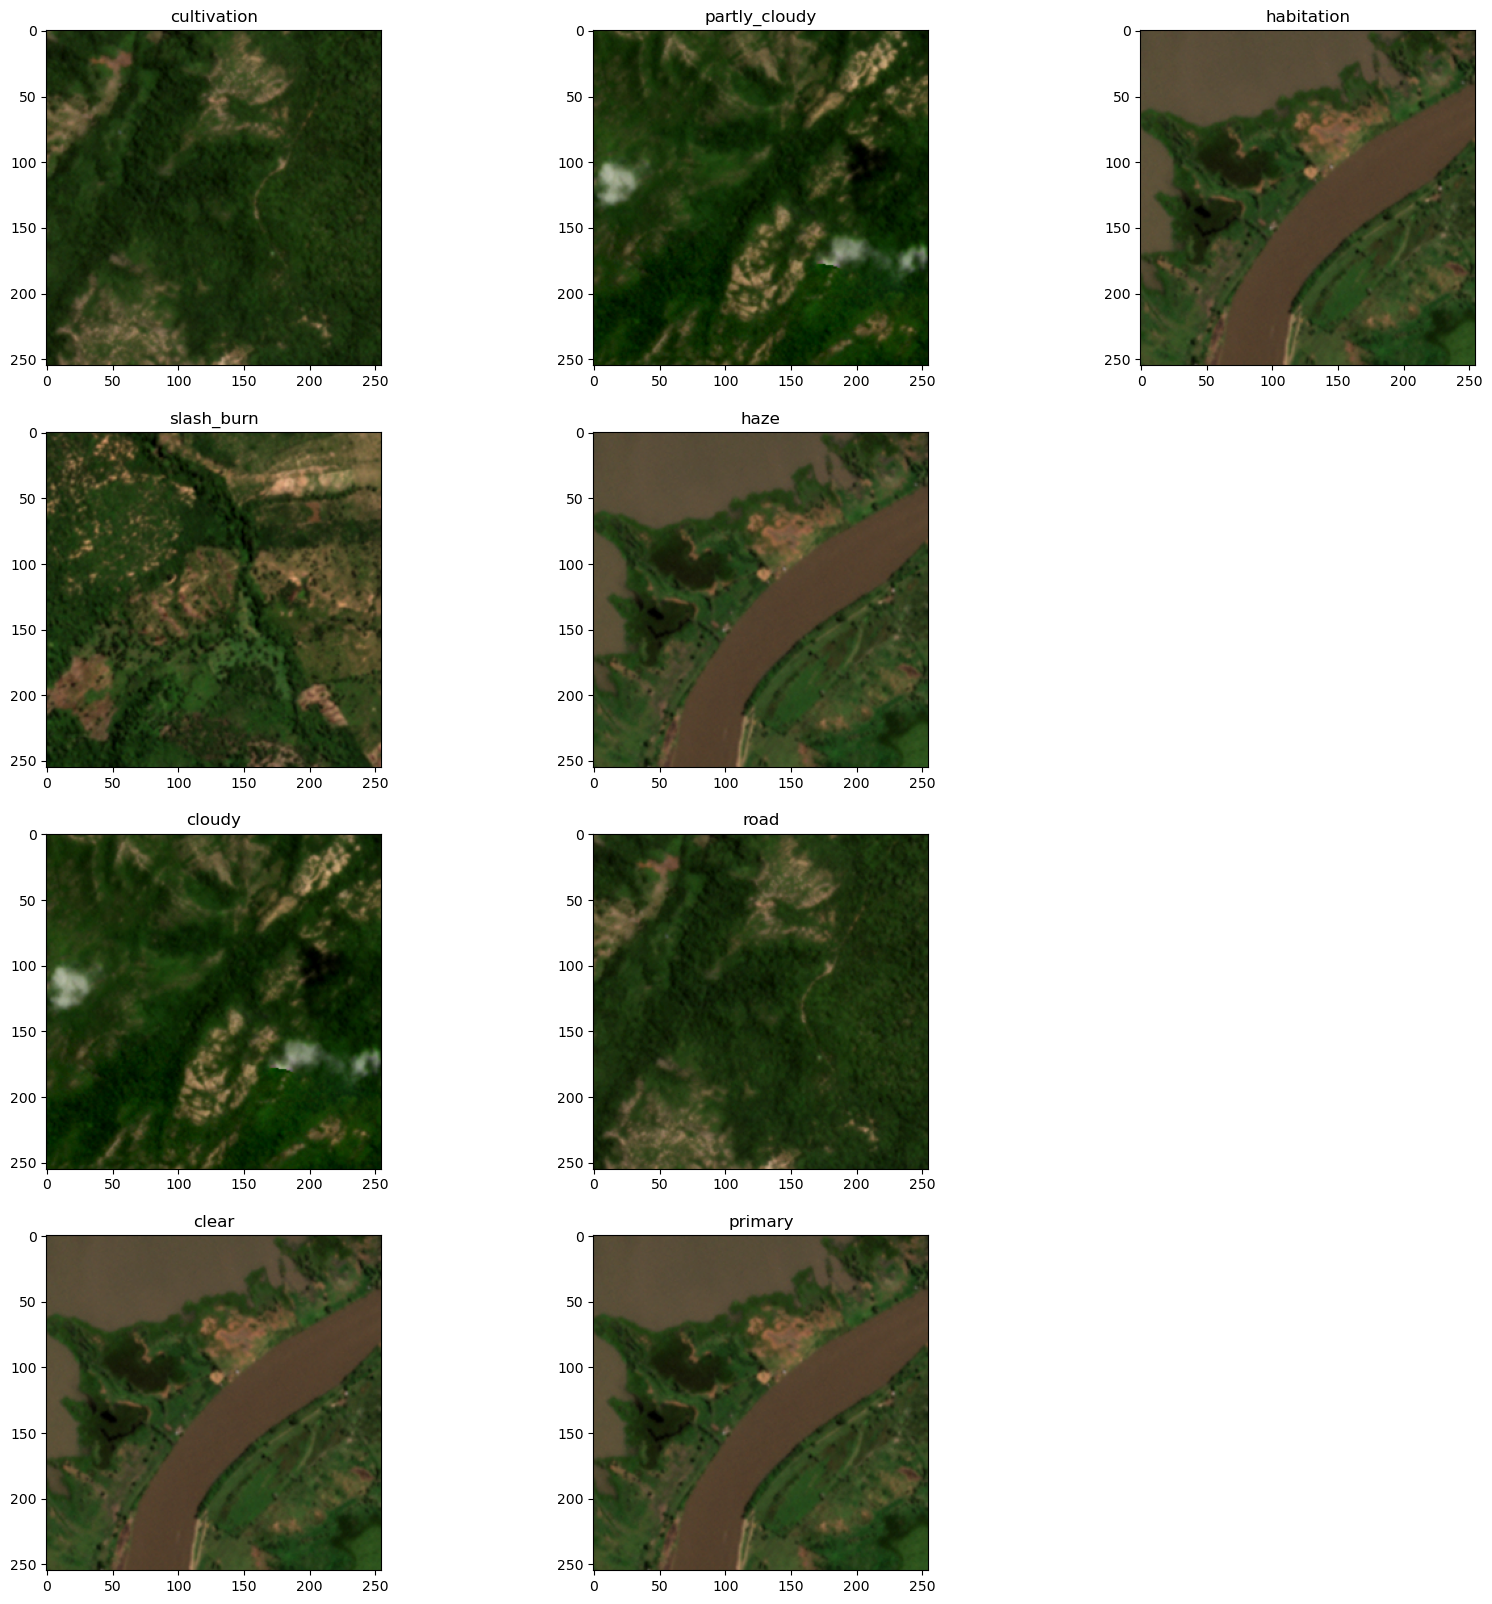

In [44]:
import cv2
pth = 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256/'

df_class_sel = df_class.iloc[600:900]
row_tags = df_class_sel.list_tags.values
tags = [tag for row in row_tags for tag in row]
all_tags = list(set(tags))
N_tags = len(all_tags)
fig, axes = plt.subplots(4, (N_tags//4)+1, figsize=(20, 20))


for idx, tag in enumerate(all_tags):

    filename = df_class_sel.loc[df_class_sel.labels.str.contains(tag)].img_name.values[0]
    img = cv2.imread(os.path.join(pth, filename+".jpg"))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    idx_col = idx // 4
    idx_row = idx % 4
    axes[idx_row][idx_col].set_title(tag)
    axes[idx_row][idx_col].imshow(img)
axes[1][-1].remove()
axes[2][-1].remove()
axes[3][-1].remove()

We need to convert each image to a normalized 1D vector that we can stake onto each other. This matrix will be the input of our TSNE.

In [26]:
def load_img(path_file):
    img = cv2.imread(path_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (100, 100), cv2.INTER_LINEAR).astype(float)
    img = cv2.normalize(img, None, 0.0, 1.0, cv2.NORM_MINMAX)
    img = img.reshape(1, -1)
    return img

We only sample 600 images as an estimation of our dataset diversity.

In [38]:
filenames = df_class.img_name.sample(600).values
path_files = [os.path.join(pth, filename+".jpg") for filename in filenames]
X_train_sample = np.vstack([load_img(path_file) for path_file in path_files])
X_train_sample.shape

(600, 30000)

In [39]:
from sklearn.manifold import TSNE

In [40]:
tsne = TSNE(
    n_components=2,
    init="random",
    random_state=101,
    method="barnes_hut",
    n_iter=500,
    verbose=2,
)
X_embedded = tsne.fit_transform(X_train_sample)
X_embedded.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.033s...
[t-SNE] Computed neighbors for 600 samples in 0.348s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 6.389824
[t-SNE] Computed conditional probabilities in 0.032s
[t-SNE] Iteration 50: error = 76.3881073, gradient norm = 0.8651393 (50 iterations in 0.114s)
[t-SNE] Iteration 100: error = 79.2136078, gradient norm = 0.5255489 (50 iterations in 0.236s)
[t-SNE] Iteration 150: error = 81.1319504, gradient norm = 0.3278626 (50 iterations in 0.121s)
[t-SNE] Iteration 200: error = 82.3266907, gradient norm = 0.3464723 (50 iterations in 0.124s)
[t-SNE] Iteration 250: error = 77.6705246, gradient norm = 0.4590826 (50 iterations in 0.118s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.670525
[t-SNE] Iteration 300: error = 1.4918445, gradient norm = 0.0157917 (50 iterations in 0.101s)
[t-SNE] Iteration 350: error = 1.4553474, gradient norm = 0.0016452 (

(600, 2)

In [41]:
def fetch_img(path_file, h, w):
    img = cv2.imread(path_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (h*2, w*2), cv2.INTER_LINEAR)
    return img

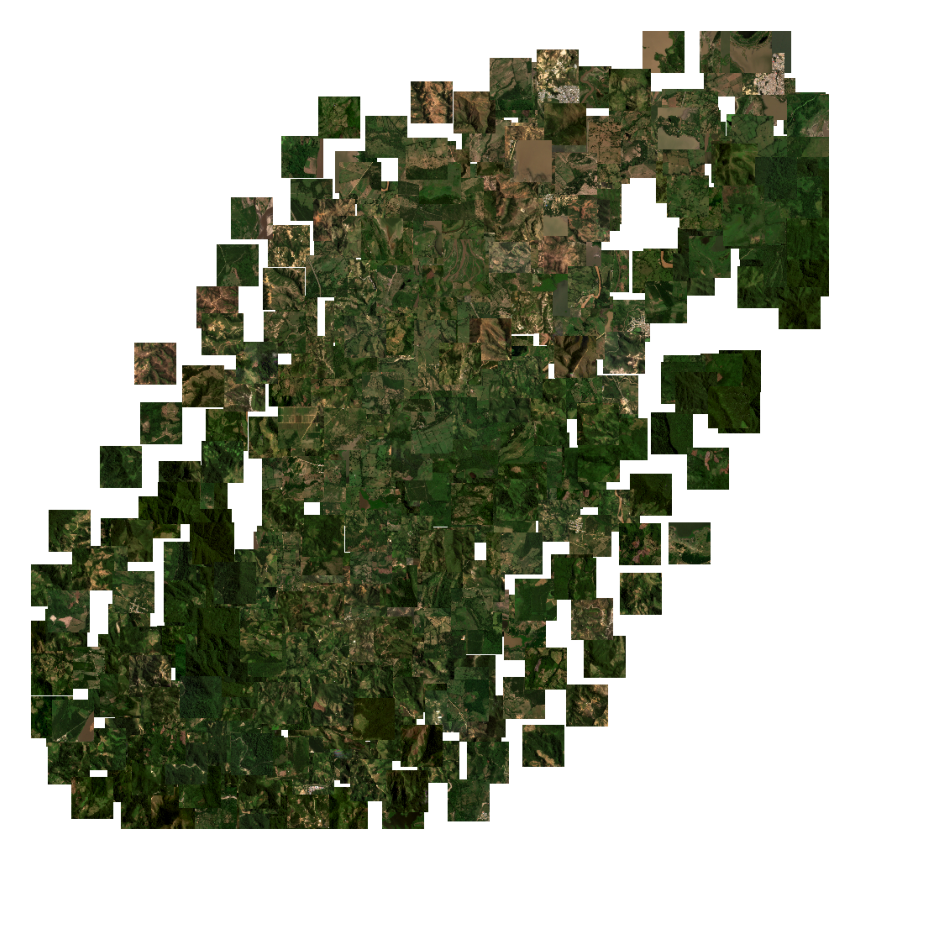

In [42]:
size_img = 1000
offset_img = 50
h = w = int(offset_img / 2)

X_scaled = (X_embedded - X_embedded.min(0)) / (X_embedded.max(0) - X_embedded.min(0))
X_scaled = (X_scaled * size_img).astype(int)
X_scaled = np.clip(X_scaled, offset_img, size_img-offset_img)

img_tsne = np.ones((size_img+2*offset_img, size_img+2*offset_img, 3), dtype=np.uint8) * 255
for idx in range(X_scaled.shape[0]):
    x, y = X_scaled[idx][0], X_scaled[idx][1]
    img = fetch_img(path_files[idx], h, w)
    img_tsne[x-w:x+w, y-h:y+h, :] = img

fig = plt.figure(figsize=(12, 12))
plt.imshow(img_tsne);
plt.axis("off");

In [ ]:
cult_lst = df_class.loc[df_class['cultivation']==1].img_name.to_list()


In [ ]:
print(len(cult_lst))

1687


In [ ]:

# TODO: correct thresholds

# TODO: limitation: now only first cell of raster is selected as cultivation, allthough there might be multiple
# ras_area, ras_arr_area = gfh.read_rast_rasterio(nw_pth+f'{name}.tif')

#TODO: save list

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    field_list = []
    pth = 'C:/Users/hanna/Documents/EPA/scriptie/sat_data_correct/juli_aug/tiles_256/'
    bbox_lst = []
    bbox_lst_rst2 = []
    bbox_lst_clp = []
    bbox_lst_nf = []

    for i in tqdm(cult_lst):
        tst = xr.open_rasterio(pth+i+'.tif')
        raster2 = tst[0].astype(float).rio.reproject("EPSG:4326")
        rst2bounds = gfh.create_geom(raster2.rio.bounds())
        if geom_area.intersects(rst2bounds):
            left,bottom,right,top =  raster2.rio.bounds()

            left= find_nearest_x(left, north_faces.x.values)
            right= find_nearest_x(right, north_faces.x.values)
            bottom = find_nearest_x(bottom, north_faces.y.values)
            top = find_nearest_x(top, north_faces.y.values)



            north_faces_clipped = north_faces.rio.clip_box(left,bottom,right,top)
            # bbox_lst_rst2.append(raster2.rio.bounds())
            bbox_lst_clp.append(north_faces_clipped.rio.bounds())
            bbox_lst_nf.append(north_faces.rio.bounds())

            pot_fields = np.argwhere(north_faces_clipped.where(north_faces_clipped.data>0,0).values)
            if len(pot_fields)>0:
                to_append =[north_faces_clipped[pot_fields[0][0], pot_fields[0][1]].x.values, north_faces_clipped[pot_fields[0][0], pot_fields[0][1]].y.values]
                field_list.append(to_append)
                bbox_lst_rst2.append(raster2.rio.bounds())

                # print('field added', to_append)
        else:
            # print('not in geom area')
            pass

  0%|          | 0/1687 [00:00<?, ?it/s]

[-74.         -73.99972222 -73.99944444 ... -73.00055556 -73.00027778
 -73.        ]
[-74.         -73.99972222 -73.99944444 ... -73.00055556 -73.00027778
 -73.        ]
[9.         8.99972222 8.99944444 ... 8.00055556 8.00027778 8.        ]
[9.         8.99972222 8.99944444 ... 8.00055556 8.00027778 8.        ]
[-74.         -73.99972222 -73.99944444 ... -73.00055556 -73.00027778
 -73.        ]
[-74.         -73.99972222 -73.99944444 ... -73.00055556 -73.00027778
 -73.        ]
[9.         8.99972222 8.99944444 ... 8.00055556 8.00027778 8.        ]
[9.         8.99972222 8.99944444 ... 8.00055556 8.00027778 8.        ]
[-74.         -73.99972222 -73.99944444 ... -73.00055556 -73.00027778
 -73.        ]
[-74.         -73.99972222 -73.99944444 ... -73.00055556 -73.00027778
 -73.        ]
[9.         8.99972222 8.99944444 ... 8.00055556 8.00027778 8.        ]
[9.         8.99972222 8.99944444 ... 8.00055556 8.00027778 8.        ]
[-74.         -73.99972222 -73.99944444 ... -73.00055556 -

In [ ]:
def val_bbox(bbox_lst,ax):
    
    pol_lst = [Polygon([[long0, lat0],
                            [long1,lat0],
                            [long1,lat1],
                            [long0, lat1]]) for long0, lat0, long1, lat1 in bbox_lst]
    
    print(f'Number of bboxes: {len(bbox_lst)}')


    for pol in pol_lst[:]:
        ax.plot(*pol.exterior.xy, linewidth = 6)
        ax.set_aspect('equal', adjustable='box')
    return ax

In [ ]:
print(field_list)

[[array(-73.99194444), array(8.05916667)], [array(-73.95888889), array(8.04833333)], [array(-73.99277778), array(8.0375)], [array(-73.97083333), array(8.0375)], [array(-73.95916667), array(8.0375)], [array(-73.99194444), array(8.02666667)], [array(-73.8775), array(8.02388889)], [array(-73.84694444), array(8.02666667)], [array(-73.98111111), array(8.02666667)], [array(-73.95944444), array(8.02666667)], [array(-73.96), array(8.01583333)], [array(-73.99861111), array(8.23333333)], [array(-73.99305556), array(8.23333333)], [array(-73.88138889), array(8.23333333)], [array(-73.9675), array(8.23333333)], [array(-73.95527778), array(8.23333333)], [array(-73.92694444), array(8.23333333)], [array(-73.99972222), array(8.2225)], [array(-73.98111111), array(8.12444444)], [array(-73.96583333), array(8.12444444)], [array(-73.95916667), array(8.12444444)], [array(-73.98861111), array(8.2225)], [array(-73.98555556), array(8.11361111)], [array(-73.95972222), array(8.11361111)], [array(-73.99972222), arr

Number of bboxes: 1364


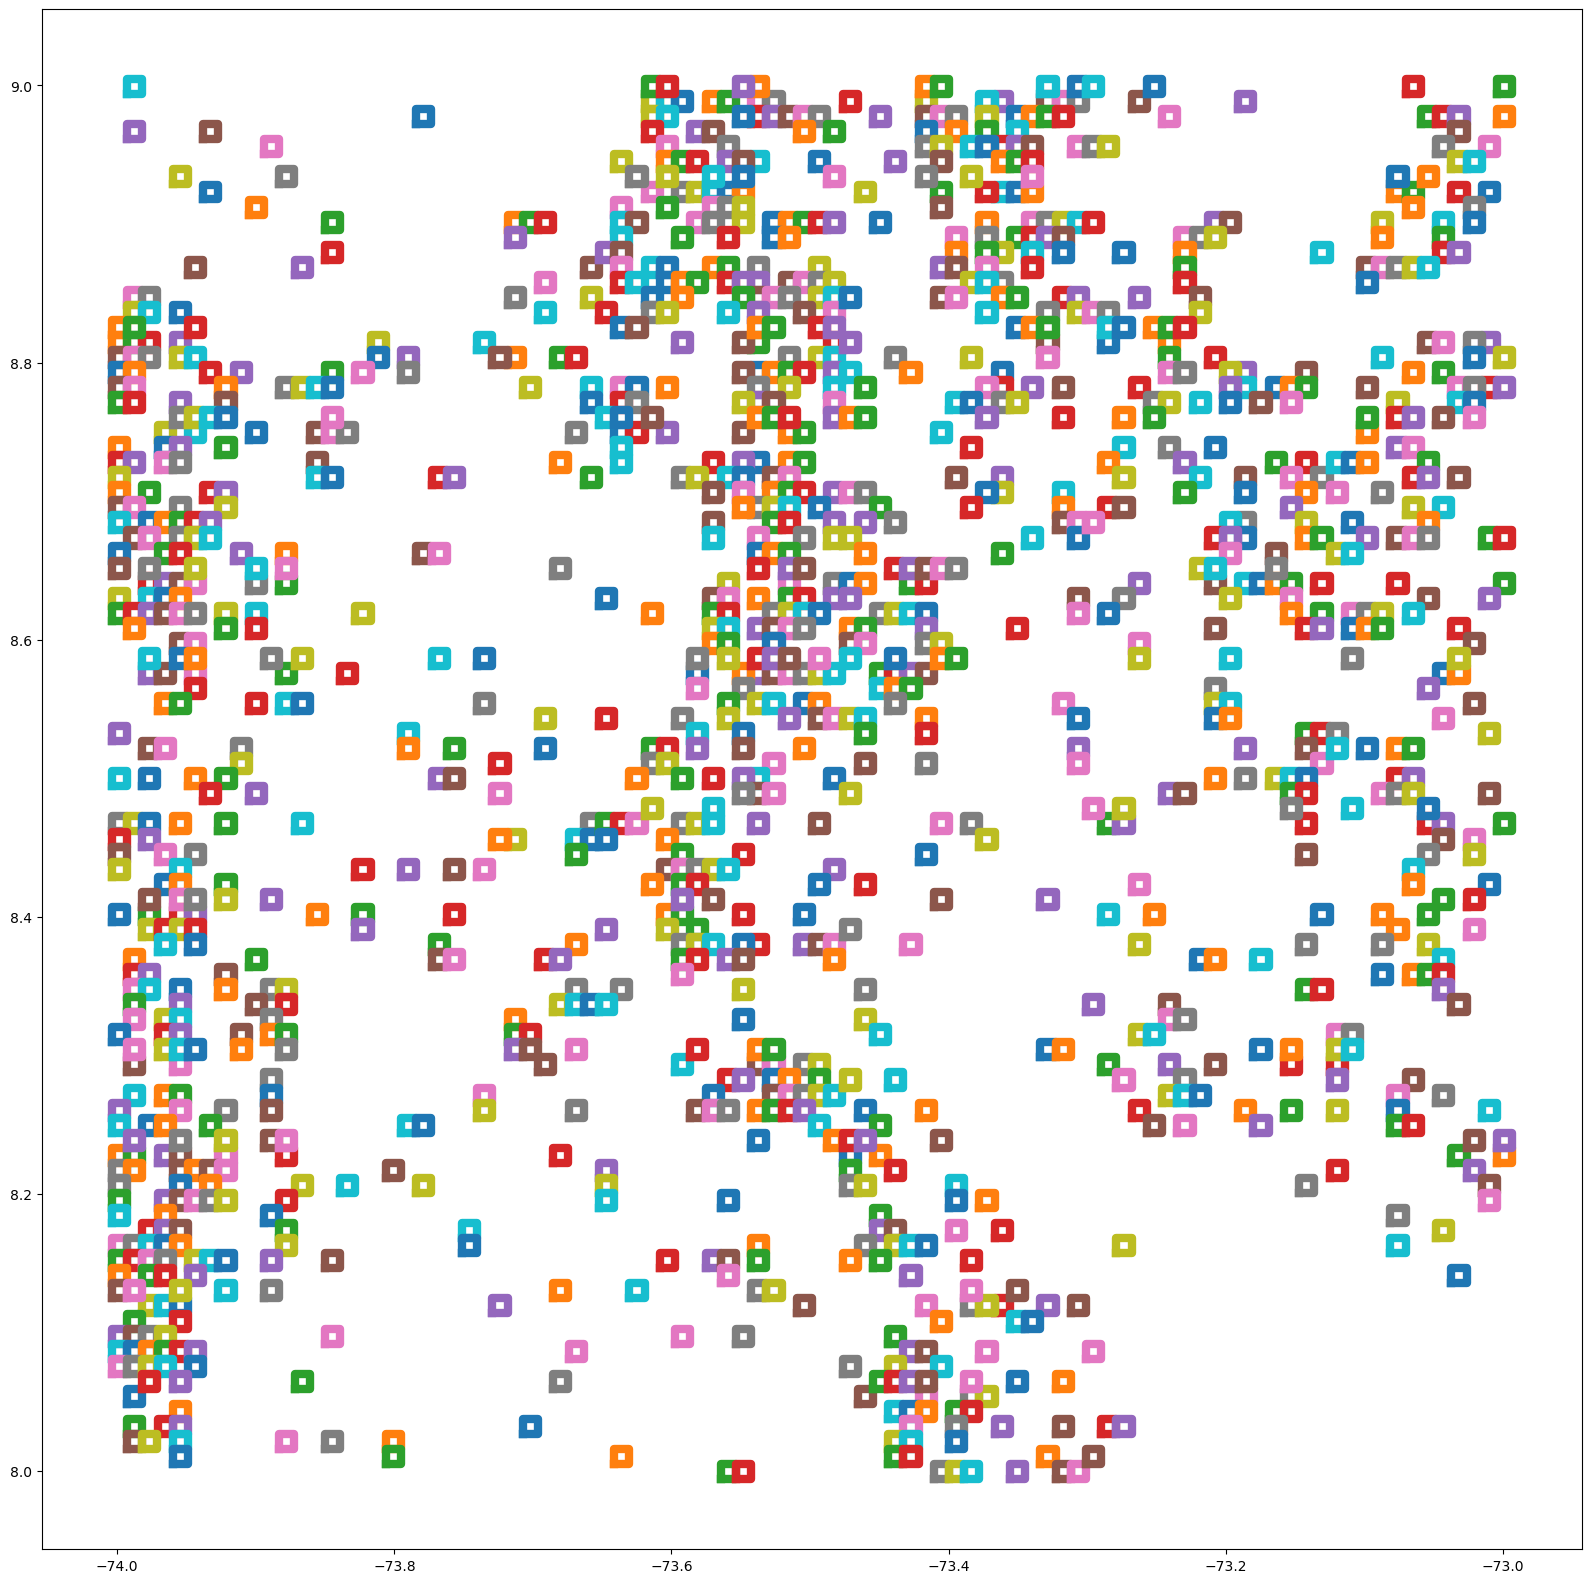

In [ ]:
f, ax = plt.subplots(figsize=(20,20))

ax = val_bbox(bbox_lst_rst2, ax)
# ax = val_bbox(bbox_lst_clp, ax)
# ax = val_bbox(bbox_lst_nf, ax)


plt.show()


In [ ]:
import pickle
with open(f'fields_final.pkl','wb') as f:
    pickle.dump(field_list, f)

import pickle
with open(f'fields_bboxes.pkl','wb') as f:
    pickle.dump(bbox_lst_rst2, f)

In [ ]:
tst

NameError: name 'tst' is not defined

In [ ]:
geom_area.bounds

(-74.0001388888889, 7.999861111111111, -72.99986111111112, 9.00013888888889)

In [ ]:
rst2bounds.bounds

(-74.95971678640772, 8.646175667703414, -74.94875011297768, 8.657056997371347)

In [ ]:
field_list

[]

In [ ]:

fig = px.bar(df_tags, x="total", y="tag", orientation="h", 
             color="total",
)
fig.update_layout(title="Class distribution")
fig.show()

NameError: name 'px' is not defined

In [ ]:
cult_lst

['L15-0597E-1069N_11',
 'L15-0597E-1069N_12',
 'L15-0597E-1069N_15',
 'L15-0597E-1069N_4',
 'L15-0597E-1070N_1',
 'L15-0597E-1070N_6',
 'L15-0597E-1070N_7']

In [ ]:
test_images

['C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_0.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_1.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_10.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_11.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_12.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_13.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_14.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_15.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_2.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_3.tif',
 'C:/Users/hanna/Documents/EPA/scriptie/large_sat_img/tiles_256\\L15-0597E-1069N_4.tif',
 'C:/Users/hann

In [ ]:
len(field_list)

21

In [ ]:
north_faces_clipped.dropna(dim='x')

<xarray.DataArray 'aspect' (y: 40, x: 0)>
array([], shape=(40, 0), dtype=float64)
Coordinates:
    band         int32 1
  * x            (x) float64 
  * y            (y) float64 8.755 8.754 8.754 8.754 ... 8.745 8.744 8.744 8.744
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    Band_1:         Band 1
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Band 1

In [ ]:
raster2.rio.bounds()

(-74.00390623966547, 8.048340047229496, -73.99293125228897, 8.059229626143905)

In [ ]:
x = raster2[100,100].coords['x'].values
y = raster2[100,100].coords['y'].values
x1 = slopemap[8,0].coords['x'].values
y1 = slopemap[8,0].coords['y'].values


In [ ]:
north_faces_clipped[0,6]

<xarray.DataArray 'aspect' ()>
array(1.)
Coordinates:
    band         int32 1
    x            float64 -74.0
    y            float64 8.755
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    Band_1:         Band 1
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Band 1

In [ ]:
north_faces_clipped.where(north_faces_clipped.isin(np.nan),0).values.

0.0

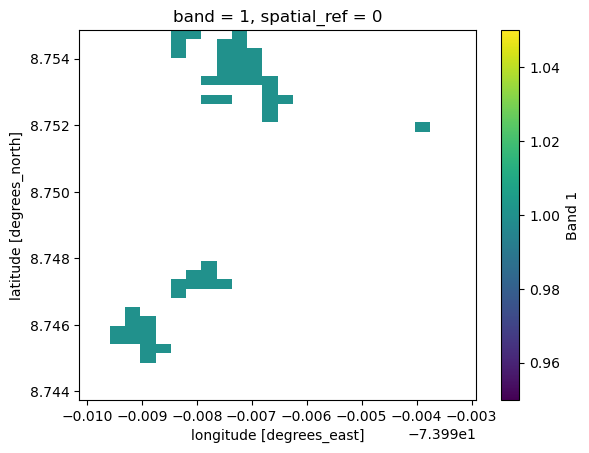

In [ ]:
north_faces_clipped.plot()

In [ ]:
pot_fields =np.argwhere(north_faces_clipped.where(north_faces_clipped.data>0,0).values)
north_faces_clipped[pot_fields[0][0], pot_fields[0][1]]


<xarray.DataArray 'aspect' ()>
array(1.)
Coordinates:
    band         int32 1
    x            float64 -74.0
    y            float64 8.755
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    Band_1:         Band 1
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Band 1

In [ ]:
pot_fields

array([[ 0,  6],
       [ 0,  7],
       [ 0, 10],
       [ 1,  6],
       [ 1,  9],
       [ 1, 10],
       [ 2,  6],
       [ 2,  9],
       [ 2, 10],
       [ 2, 11],
       [ 3,  9],
       [ 3, 10],
       [ 3, 11],
       [ 4,  9],
       [ 4, 10],
       [ 4, 11],
       [ 5,  8],
       [ 5,  9],
       [ 5, 10],
       [ 5, 11],
       [ 5, 12],
       [ 6, 12],
       [ 7,  8],
       [ 7,  9],
       [ 7, 12],
       [ 7, 13],
       [ 8, 12],
       [ 9, 12],
       [10, 22],
       [25,  8],
       [26,  7],
       [26,  8],
       [27,  6],
       [27,  7],
       [27,  8],
       [27,  9],
       [28,  6],
       [30,  3],
       [31,  3],
       [31,  4],
       [32,  2],
       [32,  3],
       [32,  4],
       [33,  2],
       [33,  3],
       [33,  4],
       [34,  4],
       [34,  5],
       [35,  4]], dtype=int64)

In [ ]:
north_faces_clipped[0,6]

<xarray.DataArray 'aspect' ()>
array(1.)
Coordinates:
    band         int32 1
    x            float64 -74.0
    y            float64 8.755
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    Band_1:         Band 1
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Band 1

In [ ]:
def _distance(x1, y1, x2, y2):
    # euclidean distance in pixel space from (y1, x1) to (y2, x2)
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def _find_nearest_pixel(py, px, data, barriers):
    # if the cell is already valid, return itself
    height, width = data.shape
    # init min distance as max possible distance
    min_distance = _distance(0, 0, data[width-1,height-1].coords['x'].values , data[width-1,height-1].coords['y'].values)
    # return of the function
    nearest_y = None
    nearest_x = None
    for y in range(height):
        for x in range(width):
                x = data[width-1,height-1].coords['x'].values
                y = data[width-1,height-1].coords['y'].values

                d = _distance(x, y, px, py)
                if d < min_distance:
                    min_distance = d
                    nearest_y = y
                    nearest_x = x
                    print(y,x,d)

    return nearest_y, nearest_x


In [ ]:
x = raster2[100,100].coords['x'].values
y = raster2[100,100].coords['y'].values

x = find_nearest_x(x, slopemap.x.values)
y = find_nearest_x(y, slopemap.y.values)

In [ ]:
print(x,y)

-73.99972222222223 8.055


In [ ]:
73.29648946454391 8.054937850924693 -74.00000000000001 8.997777777777777


SyntaxError: invalid syntax (1234345315.py, line 1)

In [ ]:
slopemap.y.values

array([8.        , 8.00027778, 8.00055556, ..., 8.99944444, 8.99972222,
       9.        ])

In [ ]:
# dem_area.bounds

In [ ]:
# geom_small = gfh.create_geom(rio.coords.BoundingBox(dem_area.bounds[0],dem_area.bounds[1],dem_area.bounds[0]+0.4, dem_area.bounds[1]+0.4))


In [ ]:
# raster = rxr.open_rasterio(pathname+'_dem.tif')
 
# clipped_raster = raster.rio.clip([geom_small])
 
# # Save clipped raster
# path_to_tif_file = pathname + "_clipped_dem.tif"

# clipped_raster.rio.to_raster(path_to_tif_file)


In [ ]:
# pathname = '../Data/dem/ASTGTMV003_N08W074_clipped'

In [ ]:
# pathname+'_dem.tif'

In [ ]:
# dem_area, dem_array_area = gfh.read_rast_rasterio(pathname+'_dem.tif')

# if os.path.exists(pathname+'_slope.tif'):
#     pass
# else:
#     pr.create_slope(pathname+'_dem.tif', pathname+"_slope.tif",  'slope_riserun')

In [ ]:
# geom_area=geom_small